### problem 1.1

In [46]:
import json,os
data_path = "./tweet_data"

filelist=[]
tweetslist=[]
retweetslist=[]
followerslist=[]
mindatalist=[]
maxdatalist=[]

for file_name in os.listdir(data_path):
    #print file_name
    filelist.append(file_name)
    number_of_tweets = 0
    number_of_retweets = 0
    number_of_followers = 0
    min_data = 100000000000000
    max_data = 0
    if file_name.endswith(".txt"):
        with open(os.path.join(data_path,file_name)) as text:
            print ("loaded " + file_name)
            for i, line in enumerate(text):
                json_object = json.loads(line)
                number_of_tweets += 1
                number_of_followers += json_object['author']['followers']
                number_of_retweets += json_object['metrics']['citations']['total']
                t = json_object['citation_date']
                if t>max_data:
                    max_data=t
                if t<min_data:
                    min_data=t
            tweetslist.append(number_of_tweets)
            retweetslist.append(number_of_retweets)
            followerslist.append(number_of_followers)
            mindatalist.append(min_data)
            maxdatalist.append(max_data)

            
#test:only evaluate first 11 tweet

loaded tweets_#nfl.txt
loaded tweets_#superbowl.txt
loaded tweets_#sb49.txt
loaded tweets_#patriots.txt
loaded tweets_#gohawks.txt
loaded tweets_#gopatriots.txt


In [52]:
print (filelist)
print (tweetslist)
print (retweetslist)
print (followerslist)
print (mindatalist)
print (maxdatalist)

['tweets_#nfl.txt', 'tweets_#superbowl.txt', 'tweets_#sb49.txt', 'tweets_#patriots.txt', 'tweets_#gohawks.txt', 'tweets_#gopatriots.txt']
[259024, 1348767, 826951, 489713, 188136, 26232]
[398517, 3221223, 2076597, 873068, 379022, 36727]
[1205304020.0, 11948692679.0, 8490567936.0, 1620939662.0, 414638907.0, 36774523.0]
[1421222404, 1421223187, 1421238675, 1421222838, 1421222681, 1421229011]
[1423335336, 1423332008, 1423335336, 1423335300, 1423304269, 1423295675]


In [58]:
import numpy as np
difftime=np.subtract(maxdatalist,mindatalist)
diffhour=difftime/3600

In [65]:
avgtweetsperhour=tweetslist/diffhour
print (avgtweetsperhour)
avgfollowers=np.array(followerslist)/np.array(tweetslist)   # wrong
print (avgfollowers)
avgnumofretweets=np.array(retweetslist)/np.array(tweetslist)
print (avgnumofretweets)

[  441.32343114  2302.50040188  1419.88790749   834.55550916   325.3715913
    45.69451057]
[  4653.2522855    8858.97466278  10267.31684949   3309.97882842
   2203.93176744   1401.8955093 ]
[ 1.53853311  2.3882724   2.51114879  1.78281565  2.01461709  1.40008387]


#### #Superbowl

In [14]:
import json,os
file_name='tweets_#superbowl.txt'
data_path = "./tweet_data"
dict={}
with open(os.path.join(data_path,file_name)) as text:
    for i, line in enumerate(text):
        json_object=json.loads(line)
        t=int(json_object['citation_date']/3600)
        if t in dict.keys():
            dict[t]+=1
        else:
            dict[t]=1

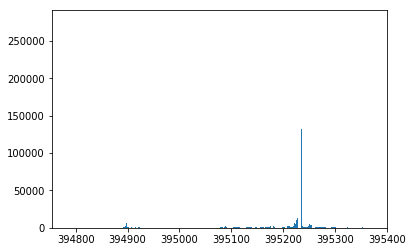

In [15]:
import matplotlib.pyplot as plt
plt.bar(dict.keys(),dict.values())
plt.show()

In [7]:
import json,os
file_name='tweets_#nfl.txt'
data_path = "./tweet_data"
dict={}
with open(os.path.join(data_path,file_name)) as text:
    for i, line in enumerate(text):
        json_object=json.loads(line)
        t=int(json_object['citation_date']/3600)
        if t in dict.keys():
            dict[t]+=1
        else:
            dict[t]=1

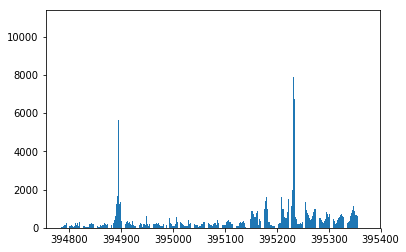

In [13]:
import matplotlib.pyplot as plt
plt.bar(dict.keys(),dict.values())
plt.show()

#### #NFL

### problem 1.2

In [6]:
import json,os
import datetime,time
import pytz
pst_tz=pytz.timezone('US/Pacific')
file_name='tweets_#nfl.txt'
data_path = "./tweet_data"
dict12={}
with open(os.path.join(data_path,file_name)) as text:
    for i, line in enumerate(text):
        json_object=json.loads(line)
        t=int(json_object['citation_date']/3600)
        if t in dict12.keys():
            dict12[t][0]+=1
            dict12[t][1]+=json_object['metrics']['citations']['total']
            dict12[t][2]+=json_object['author']['followers']
            if json_object['author']['followers'] > dict12[t][3]:
                dict12[t][3]=json_object['author']['followers']
        else:
            time=datetime.datetime.fromtimestamp(json_object['citation_date'], pst_tz)
            dict12[t]=[1,json_object['metrics']['citations']['total'],json_object['author']['followers'],\
                       json_object['author']['followers'],time.hour]

In [25]:
fmatrix=[]
for i in dict12.keys():
    fmatrix.append(dict12[i])

In [27]:
fmatrix=np.array(fmatrix)

In [41]:
l,w=fmatrix.shape
X=fmatrix[:l-1,:]
y=fmatrix[1:,0]

In [45]:
import statsmodels.api as sm
mod = sm.OLS(y,X)
res=mod.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     48.77
Date:                Tue, 13 Mar 2018   Prob (F-statistic):           4.18e-42
Time:                        11:53:57   Log-Likelihood:                -4737.1
No. Observations:                 582   AIC:                             9484.
Df Residuals:                     577   BIC:                             9506.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8616      0.189      4.563      0.0

### Part 2

In [65]:
#superbowl
import json,os
file_name='tweets_#superbowl.txt'
data_path = "./tweet_data"
X=[]
y=[]
locationlist=[]
inlist_w=['washington','WA','Washington']
notinlist_w=['DC','D.C.']
inlist_m=['Massachusetts','massachusetts','MA']
with open(os.path.join(data_path,file_name)) as text:
    for i, line in enumerate(text):
        json_object = json.loads(line)
        if any(v1 in json_object['tweet']['user']['location'] for v1 in inlist_w)\
        and all(v2 not in json_object['tweet']['user']['location'] for v2 in notinlist_w):
            X.append(json_object['tweet']['text'])
            y.append(1)
            locationlist.append(json_object['tweet']['user']['location'])
        if any(v1 in json_object['tweet']['user']['location'] for v1 in inlist_m):
            X.append(json_object['tweet']['text'])
            y.append(0)
            locationlist.append(json_object['tweet']['user']['location'])

In [76]:
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from string import punctuation
import nltk
import re

In [78]:
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
stemmer = SnowballStemmer("english", ignore_stopwords=True)
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed



def tokenize(text):
    text = "".join([ch for ch in text if ch not in punctuation])
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

def cleanup(data_set):
    for i in range(len(data_set)):
        temp=tokenize(data_set[i])
        data_set[i]=' '.join([temp[word] for word in range(len(temp))])

In [79]:
cleanup(X)

In [86]:
len(X)

32337

In [87]:
len(y)

32337